In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

stock_data = yf.download('AAPL', start = '2024-01-01', end = '2024-08-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.081497,186.857993,182.346189,185.578815,82488700
2024-01-03,182.703186,184.319507,181.890063,182.673439,58414500
2024-01-04,180.382812,181.552899,179.361461,180.620788,71983600
2024-01-05,179.658951,181.225688,178.657435,180.462163,62379700
2024-01-08,184.002182,184.041855,179.976269,180.561312,59144500
2024-01-09,183.585693,183.595604,181.195922,182.375934,42841800
2024-01-10,184.626892,184.835121,182.375945,182.802343,46792900
2024-01-11,184.031906,185.479656,182.078444,184.973928,49128400


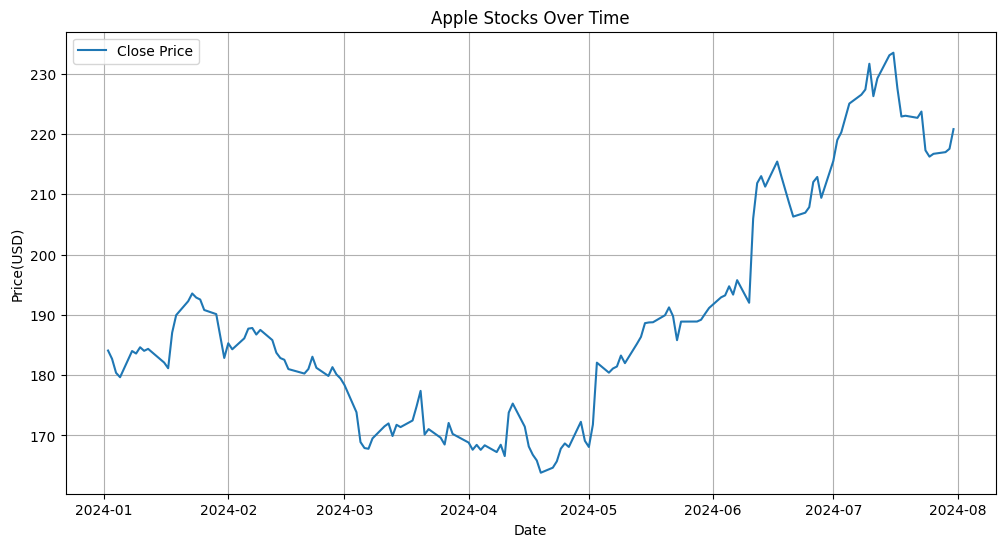

In [4]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'], label = 'Close Price')
plt.title('Apple Stocks Over Time')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(stock_data['Close'], model = 'additive', period=30)

In [6]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

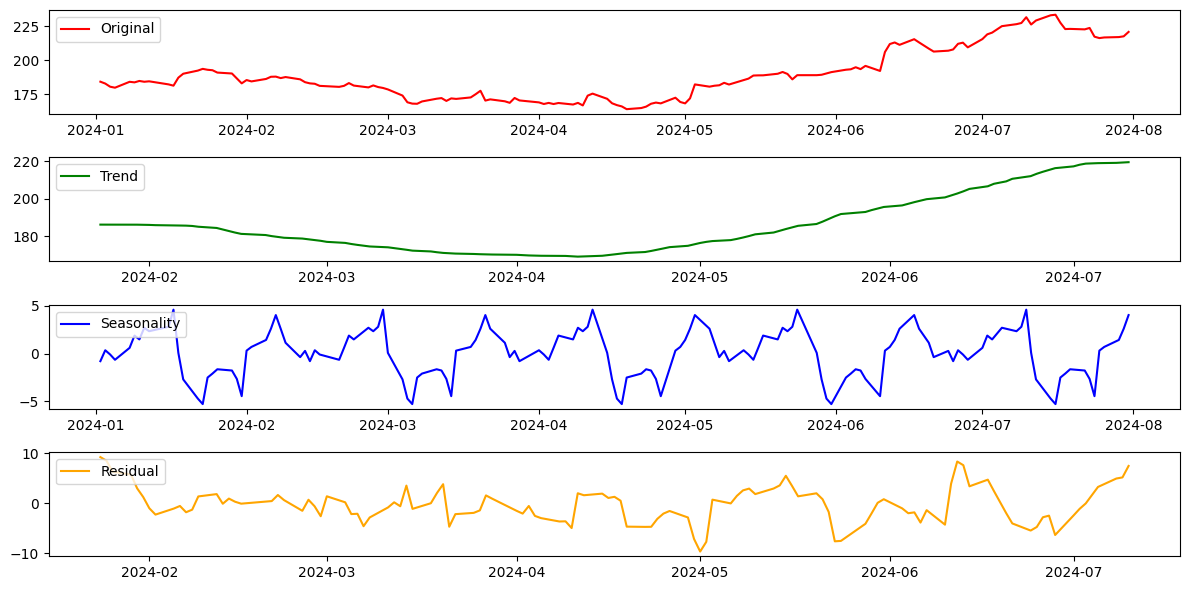

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(stock_data['Close'], label = 'Original', color = 'red')
plt.legend(loc = 'upper left')
plt.subplot(412)
plt.plot(trend_additive, label = 'Trend', color = 'green')
plt.legend(loc = 'upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label = 'Seasonality', color = 'blue')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(residual_additive, label = 'Residual', color = 'orange')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

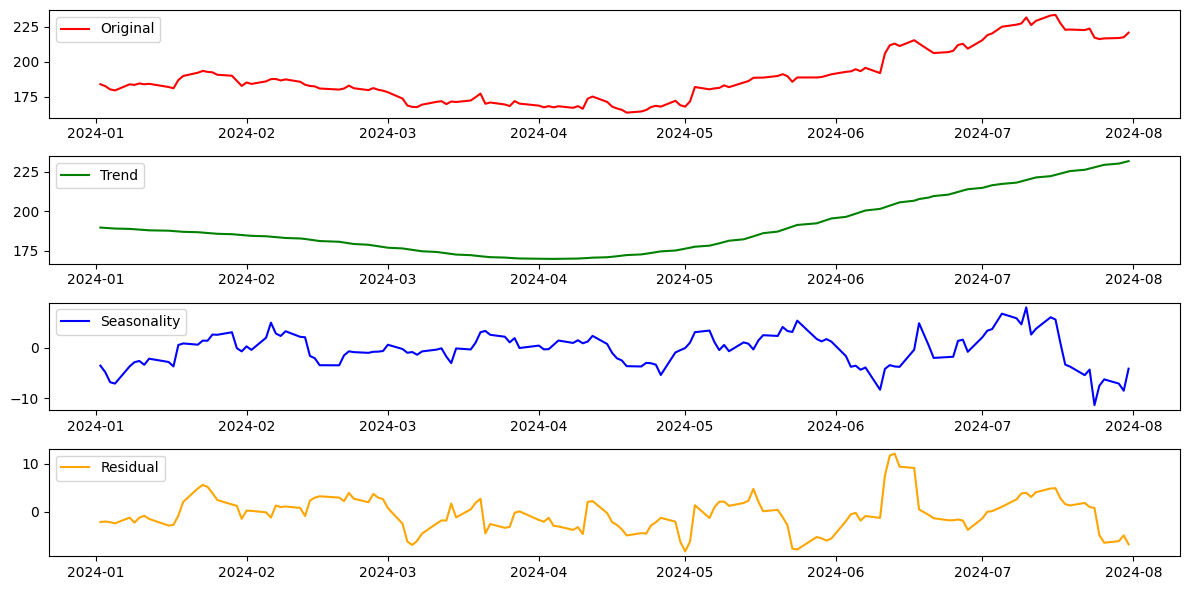

In [8]:
#STL Decomposition

from statsmodels.tsa.seasonal import STL

stl = STL(stock_data['Close'], period = 30)
result = stl.fit()


plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(result.observed, label = 'Original', color = 'red')
plt.legend(loc = 'upper left')
plt.subplot(412)
plt.plot(result.trend, label = 'Trend', color = 'green')
plt.legend(loc = 'upper left')
plt.subplot(413)
plt.plot(result.seasonal, label = 'Seasonality', color = 'blue')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(result.resid, label = 'Residual', color = 'orange')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()